In [22]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

In [3]:
fhand=pd.read_csv('mybtc(1).csv')
fhand

,Unnamed: 0,Date,High,Low,Close,Volume,Open,H-L,3day MA,10day MA,...,RSI,ATR,OBV,HT_DCPERIOD,Last1Price,Last2Price,Last3Price,Last4Price,Last5Price,tag
0,32,2014-02-08,730.0000,680.01000,699.30255,31.042254,689.00000,49.99000,761.410300,796.146558,...,22.702711,40.886460,-168.377924,15.646696,714.12206,767.60884,802.50000,802.40000,819.78000,-1
1,33,2014-02-09,756.0998,684.85098,689.00000,38.291274,690.20000,71.24882,727.011150,786.576813,...,21.318570,45.223940,-206.669198,17.190252,699.30255,714.12206,767.60884,802.50000,802.40000,-1
2,34,2014-02-10,748.0000,550.00000,690.20000,29.856668,714.56111,198.00000,700.808203,774.676813,...,21.942173,67.049091,-176.812530,18.731589,689.00000,699.30255,714.12206,767.60884,802.50000,0
3,35,2014-02-11,720.0000,660.00000,714.56111,33.331274,670.66590,60.00000,692.834183,762.477776,...,33.905912,66.042078,-143.481256,20.302886,690.20000,689.00000,699.30255,714.12206,767.60884,1
4,36,2014-02-12,709.9300,651.30901,670.66590,17.641851,623.94582,58.62099,697.920370,751.433887,...,25.868810,65.643510,-161.123107,21.888230,714.56111,690.20000,689.00000,699.30255,714.12206,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,2651,2021-04-20,57110.4000,53388.30000,56500.00000,7804.231919,53815.20000,3722.10000,57348.333333,60285.450000,...,39.522061,3659.234161,611531.445401,16.272246,55720.00000,56239.80000,60085.20000,61455.00000,63243.00000,1
2620,2652,2021-04-21,56805.5000,53600.00000,53815.20000,4788.013532,51730.00000,3205.50000,56153.266667,59957.890000,...,31.587568,3594.414995,606743.431869,15.992169,56500.00000,55720.00000,56239.80000,60085.20000,61455.00000,-1
2621,2653,2021-04-22,55459.4000,50500.00000,51730.00000,10144.204074,51178.70000,4959.40000,55345.066667,59343.810000,...,26.873534,3789.412853,596599.227795,15.760320,53815.20000,56500.00000,55720.00000,56239.80000,60085.20000,-1
2622,2654,2021-04-23,52124.4000,47549.30000,51178.70000,11159.243380,50093.40000,4575.10000,54015.066667,58534.440000,...,25.731360,3901.653874,585439.984415,15.631061,51730.00000,53815.20000,56500.00000,55720.00000,56239.80000,-1


In [4]:
del fhand['Date']

In [15]:
x=fhand.iloc[:,:5]
y=fhand.loc[:,['tag']]

In [16]:
x

,Unnamed: 0,High,Low,Close,Volume
0,32,730.0000,680.01000,699.30255,31.042254
1,33,756.0998,684.85098,689.00000,38.291274
2,34,748.0000,550.00000,690.20000,29.856668
3,35,720.0000,660.00000,714.56111,33.331274
4,36,709.9300,651.30901,670.66590,17.641851
...,...,...,...,...,...
2619,2651,57110.4000,53388.30000,56500.00000,7804.231919
2620,2652,56805.5000,53600.00000,53815.20000,4788.013532
2621,2653,55459.4000,50500.00000,51730.00000,10144.204074
2622,2654,52124.4000,47549.30000,51178.70000,11159.243380


In [17]:
lr=linear_model.LogisticRegression(solver='liblinear')
lr.fit(x,y)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
lr.score(x,y)

0.6116615853658537

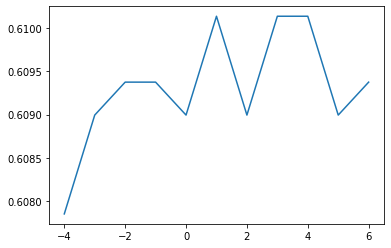

In [24]:
import matplotlib.pyplot as plt
from math import log10
from sklearn.model_selection import KFold
kf=KFold(n_splits=4)
Accuracy=[]
for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]:
    acc=[]
    for train_index, test_index in kf.split(x,y):
        lr = LogisticRegression(solver='lbfgs', multi_class='multinomial',C = c,max_iter=100000000000)
        lr.fit(x.iloc[train_index],y.iloc[train_index])
        acc.append(lr.score(x.iloc[test_index],y.iloc[test_index]))
    Accuracy.append(np.mean(acc))
C=[0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000]
C1=[]
for i in C:
    C1.append(log10(i))
plt.plot(C1,Accuracy)

In [30]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial',C = 10,max_iter=100000000000)
lr.fit(x,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000000000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
lr.score(x,y)

0.6108993902439024

In [33]:
from sklearn.utils import shuffle
 
X_shuffle, y_shuffle = shuffle(x, y)

In [34]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial',C = 1e9,max_iter=100000000000)
lr.fit(X_shuffle,y_shuffle)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000000000, multi_class='multinomial',
                   n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
                   tol=0.0001, verbose=0, warm_start=False)

In [35]:
lr.score(X_shuffle,y_shuffle)

0.6105182926829268

In [53]:
cm=confusion_matrix(lr.predict(X_shuffle),y_shuffle)
cm

array([[342,  61,  49],
       [348, 731, 353],
       [ 65, 146, 529]], dtype=int64)

In [48]:
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

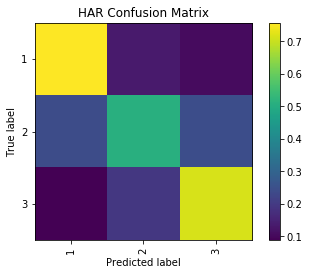

In [52]:
plot_confusion_matrix(cm, ["1",'2','3'], "HAR Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()